In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import pandas as pd
import numpy as np

#Load dataset
iris = datasets.load_iris()
iris_dataset = pd.DataFrame(iris.data)

In [ ]:
# print the names of the 13 features
print("Features:", iris.feature_names, sep="\n")


# print the label type of wine(class_0, class_1, class_2)
print("\nLabels:", iris.target_names)

# print data(feature)shape
iris_dataset.shape

Features:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Labels: ['setosa' 'versicolor' 'virginica']


(150, 4)

In [ ]:
#import the necessary module
from sklearn.model_selection import train_test_split

#split data set into train and test sets
train_x, test_x, train_y, test_y = train_test_split(iris.data, iris.target, test_size = 0.3, random_state = 82)


In [ ]:
#Create a Decision Tree Classifier (using Gini)
DT = DecisionTreeClassifier(criterion = "gini")

#Train the model using the training sets
final_model = DT.fit(train_x, train_y)


In [ ]:
# Predict the classes of test data
prediction = DT.predict(test_x)
print("prediction:",prediction)
print(prediction.dtype)
from sklearn import metrics


prediction: [2 2 0 0 0 2 1 1 1 1 1 2 0 0 0 0 2 1 0 1 0 2 0 2 2 1 2 0 2 1 0 2 0 2 2 0 0
 0 1 0 2 1 2 1 0]
int64


In [ ]:

# Model Accuracy, how often is the classifier correct?
Accuracy_Output = metrics.accuracy_score(test_y, prediction)
print("Accuracy:",Accuracy_Output)


Accuracy: 0.9333333333333333


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(DT,out_file='iris_tree.dot',feature_names=list(iris.feature_names),
               class_names=list(iris.target_names), filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'iris_tree.dot', '-o', 'iris_tree.png', '-Gdpi=600'], shell = True)

0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


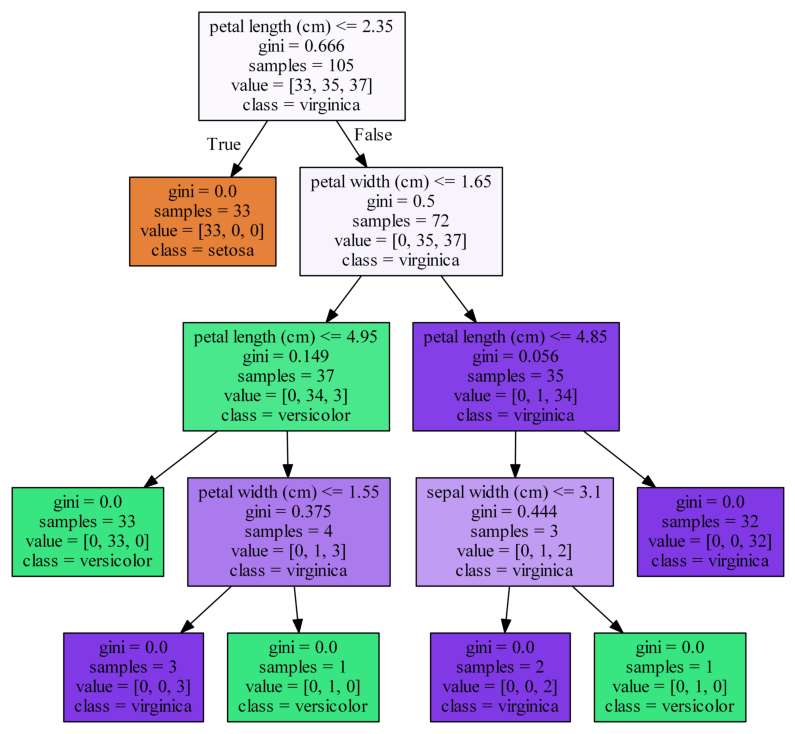

In [ ]:
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('/content/drive/My Drive/Colab Notebooks/LAB 4/iris_tree.png'))
plt.axis('off')
plt.show()

**Exercise:**



**4) 76 <=Rollnumber<= 100:**


  Task 1: Try the algo on Same Whether dataset - OneHotEncoding of features:and Train test Division 75%-25% and Gini Index as attribute selection measure

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [ ]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
            'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
            'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [ ]:
dataset_list = list(zip(Outlook, Temperature, Humidity, Wind, Play))
dataset = pd.DataFrame(dataset_list, columns = ["Outlook", "Temperature", "Humidity", "Wind", "Play"])
print("Number of examples and feature:", dataset.shape)
dataset.head()

Number of examples and feature: (14, 5)


,Outlook,Temperature,Humidity,Wind,Play
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play         14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [ ]:
start = "\033[1m"
end = "\033[0;0m"

print(start + "Unique Outlook values: " + end, dataset['Outlook'].unique())

print(start + "\nUnique Temperature values: " + end, dataset['Temperature'].unique())

print(start + "\nUnique Humidity values: " + end, dataset['Humidity'].unique())

print(start + "\nUnique Wind values: " + end, dataset['Wind'].unique())

print(start + "\nUnique Play values " + "\033[91m (Class Label): " + end, dataset['Play'].unique())

Unique Outlook values:  ['Rainy' 'Overcast' 'Sunny']

Unique Temperature values:  ['Hot' 'Mild' 'Cool']

Unique Humidity values:  ['High' 'Normal']

Unique Wind values:  ['False' 'True']

Unique Play values  (Class Label):  ['No' 'Yes']


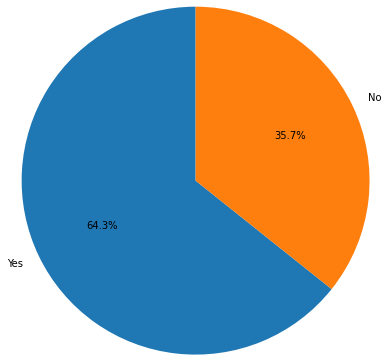

In [ ]:

pie_chart = dataset['Play'].value_counts().plot.pie(autopct = "%1.1f%%", radius = 2, startangle = 90)
pie_chart.set_ylabel('')
plt.show()

In [ ]:
dummy = pd.get_dummies(dataset.iloc[:,:-1])

cols = dataset.columns.tolist()
cols.remove("Play")

dataset = dataset.drop(cols, axis = 1)
dataset = pd.concat([dummy,dataset], axis = 1)

In [ ]:
print("\nLabel\n\n")
labels = dataset['Play']
labels


Label




0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play, dtype: object

In [ ]:
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(dataset.iloc[:,:-1],
                        labels, test_size = 0.25, random_state = 82)
# Roll no 82

In [ ]:
DT = DecisionTreeClassifier(max_leaf_nodes = 82, random_state = 82) # roll no 82
# as max_leaf_nodes is less i.e 2 ...model might underfit

# fitting the model or training
final_model = DT.fit(data_train,target_train)

In [ ]:

# testing
target_predict = DT.predict(data_test)

In [ ]:
# Accuracy
Accuracy = accuracy_score(target_test, target_predict)
print("Accuracy:", Accuracy)

Accuracy: 0.5


In [ ]:
# Confusion Matrix
cm = confusion_matrix(target_test, target_predict)
print("Confusion Matrix:\n")
cm

Confusion Matrix:



array([[1, 1],
       [1, 1]])

In [ ]:
# Precision
precision = precision_score(target_test, target_predict, average=None)
print("Precision:\n")
precision

Precision:



array([0.5, 0.5])

In [ ]:
# Recall
recall = recall_score(target_test, target_predict, average=None)
print("Recall:\n")
recall

Recall:



array([0.5, 0.5])

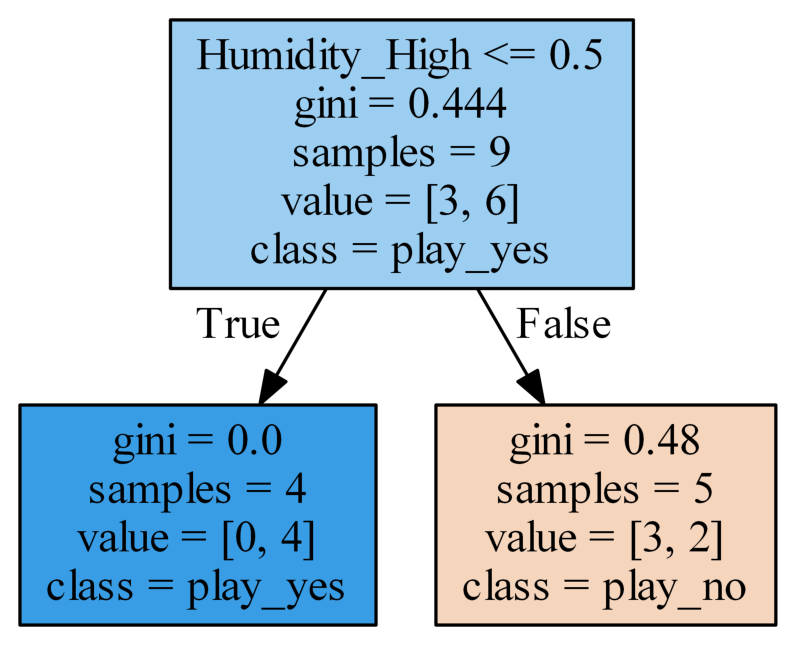

In [ ]:
from sklearn.tree import export_graphviz

features = dataset.columns.tolist()
features.remove("Play")

export_graphviz(DT,out_file='onehot_tree_entropy.dot',
               feature_names=features,
               class_names=['play_no','play_yes'], 
               filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'onehot_tree_entropy.dot', '-o', 'onehot_tree_entropy.png', '-Gdpi=600'], shell=True)

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('/content/drive/My Drive/Colab Notebooks/LAB 4/onehot_tree_entropy.png'))
plt.axis('off')
plt.show()

(1) What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?

In [ ]:
'''
Rainy = 0,1,0
Mild = 0,0,1
Normal = 0,1
False = 1,0
'''
q1 = [0,1,0,0,0,1,0,1,1,0]

(2) What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’, and Wind = ’True’?

In [ ]:
'''
Sunny = 0,0,1
Cool = 1,0,0
High = 1,0
True = 0,1
'''
q2 = [0,0,1,1,0,0,1,0,0,1]

features = dataset.columns.tolist()
features.remove("Play")
df = pd.DataFrame([q1,q2], columns = features)
df.head()

,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_False,Wind_True
0,0,1,0,0,0,1,0,1,1,0
1,0,0,1,1,0,0,1,0,0,1


In [ ]:
ans = DT.predict(df)
print("Play predicted:\nq1: {}\nq2: {}".format(ans[0],ans[1]))

Play predicted:
q1: Yes
q2: No


Task 2: Apply algorithm on breast cancer wisconsin dataset - One Hot Encoding of features: and Train test Division 80%-20%

In [ ]:
import pandas as pd
from sklearn.tree import export_graphviz
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import datasets

In [ ]:
wine = datasets.load_wine()
wine_dataset = pd.DataFrame(wine.data, columns = wine.feature_names)

# print the names of the 13 features
print("Features:", wine.feature_names, sep="\n")


# print the label type of wine(class_0, class_1, class_2)
print("\nLabels:", wine.target_names)

# print data(feature)shape
print("Shape:", wine_dataset.shape)
wine_dataset.head()

Features:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Labels: ['class_0' 'class_1' 'class_2']
Shape: (178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(wine.data, wine.target, test_size = 0.2, random_state = 82) # roll no 82

In [ ]:
#Create a Decision Tree Classifier (using Entropy)
DT = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = 82) # roll no 82

#Train the model using the training sets
final_model = DT.fit(train_x, train_y)

In [ ]:
# Predict the classes of test data
prediction = DT.predict(test_x)
print("prediction:",prediction)
print(prediction.dtype)

prediction: [1 2 0 1 1 1 2 1 1 1 1 0 0 0 0 1 1 0 0 0 2 0 1 0 1 2 2 1 1 0 2 1 0 0 1 1]
int64


In [ ]:
# Model Accuracy, how often is the classifier correct?
Accuracy = accuracy_score(test_y, prediction)
print("Accuracy:",Accuracy)

Accuracy: 1.0


In [ ]:
export_graphviz(DT,out_file='wine_tree.dot',feature_names=list(wine.feature_names),
               class_names=list(wine.target_names), filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'wine_tree.dot', '-o', 'wine_tree.png', '-Gdpi=600'], shell = True)

0

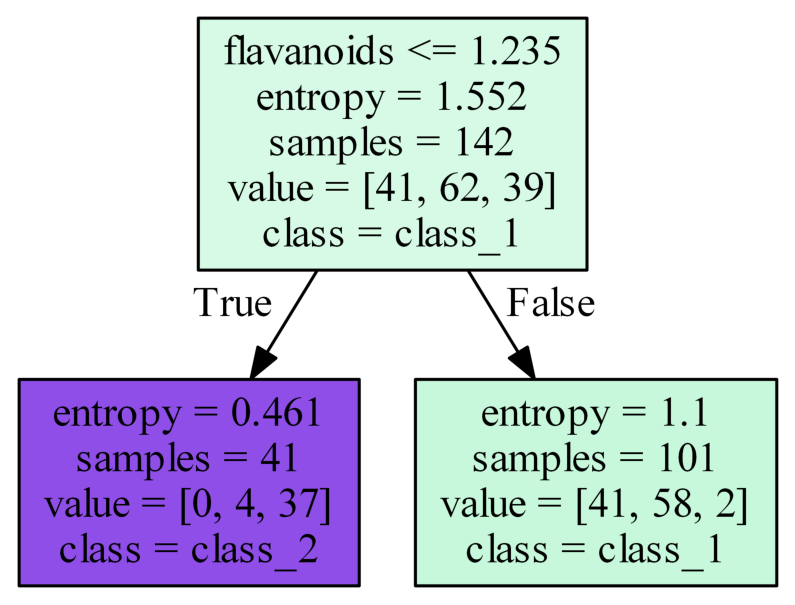

In [ ]:
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('/content/drive/My Drive/Colab Notebooks/LAB 4/wine_tree.png'))
plt.axis('off')
plt.show()